In [22]:
import numpy as np
from numpy import linalg as la
import matplotlib.pyplot as pl
import matplotlib.ticker as tk

In [23]:
# Abbildung definieren (letzte Zeile muss mit 1 aufgefüllt werden)
P = np.array ([
    [1, 2, 2, 3, 3, 2, 2, 4, 4, 1, 1],
    [1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
])
print (P)

# Rotationswinkel (im Gradmass)
rot = 225

# Translation oder Rotationszentrum (0, 0 für Standard)
tl_x = -2
tl_y = 6

# Skalierung
s = 2 # Skalierungsfaktor

# Drehstreckung
ds = 1 # Kann für "nach vorne lehnen" auch negativ sein

# Drehstreckung mit Winkel
dss = 2 # Skalierungsfaktor der Drehstreckung
dw = 30 # Drehwinkel

# Achsenspiegelung horizontal/vertikal
h = False
v = True

# Achsenspiegelung mit Winkel
aw = 45 # Winkel der Spiegelachse

# Scherung
sx = 1
sy = 2

[[1 2 2 3 3 2 2 4 4 1 1]
 [1 1 2 2 3 3 4 4 5 5 1]
 [1 1 1 1 1 1 1 1 1 1 1]]


### Definition Methoden

In [24]:
# Translation
def tl(u,v):
    return np.array([
        [1,0,u],
        [0,1,v],
        [0,0,1]
    ])

# Rotation
def rt(phi):
    t = phi * np.pi / 180 # Vom Grad- ins Bogenmass
    c = np.cos(t)
    s = np.sin(t)
    return np.array([
        [c, -s, 0],
        [s,  c, 0],
        [0,  0, 1]
    ])

# Skalierung
def sk(s):
    return np.array([
        [s ,0, 0],
        [0 ,s, 0],
        [0, 0, s]
    ])

# Drehstreckung
def drst(ds):
    return np.array([
        [1  , -ds, 0],
        [ds, 1 , 0],
        [0  , 0 , 1]
    ])

# Drehstreckung mit Winkel
def drstw(ds, dw):
    t = dw * np.pi / 180 # Vom Grad- ins Bogenmass
    c = ds * np.cos(t)
    s = ds * np.sin(t)
    return np.array([
        [c , -s, 0],
        [s , c , 0],
        [0 , 0 , 1]
    ])

# Achsenspiegelung
def acs(h, v):
    h = 1-2*h
    v = 1-2*v

    return np.array([
        [v, 0, 0],
        [0, h ,0],
        [0, 0 ,0]
    ])

# Achsenspiegelung mit Winkel
def acw(aw):
    t = aw * np.pi / 180 # Vom Grad- ins Bogenmass
    c = np.cos(2 * t)
    s = np.sin(2 * t)
    return np.array([
        [c , s, 0],
        [s , -c , 0],
        [0 , 0 , 1]
    ])

# Scherung
def sch(sx, sy):
    return np.array([
        [1 , sx, 0],
        [sy, 1 , 0],
        [0 , 0 , 1]
    ])

### Plot Rotation

Translationsmatrix:
[[ 1  0 -2]
 [ 0  1  6]
 [ 0  0  1]]
Rotationsmatrix:
[[-0.7071  0.7071  0.    ]
 [-0.7071 -0.7071  0.    ]
 [ 0.      0.      1.    ]]
Q = T*R*T^-1:
[[ 2  3  4  5  6  5  6  8  9  6  2]
 [ 3  5  6  8  9  7  8 12 13  7  3]
 [ 1  1  1  1  1  1  1  1  1  1  1]]


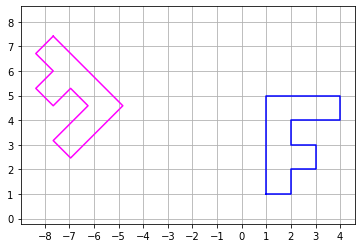

In [33]:
axs = pl.axes()
axs.axis ('equal')
axs.xaxis.set_major_locator (tk.MultipleLocator (1.0))
axs.yaxis.set_major_locator (tk.MultipleLocator (1.0))
axs.grid()

T = tl(tl_x, tl_y)
R = rt(rot)
print(f'Translationsmatrix:\n{T}')
print(f'Rotationsmatrix:\n{np.around(R, 4)}')
print(f'Q = T*R*T^-1:\n{Q}')
Q = T @ R @ la.inv(T) @ P # Zuerst verschieben, dann um den 0 Punkt rotieren und wieder zurück verschieben (inverse der Translationsmatrix)
pl.plot (P [0, :], P [1, :], 'blue')
pl.plot (Q [0, :], Q [1, :], 'magenta')

### Plot Translation

Translationsmatrix:
[[ 1  0 -2]
 [ 0  1  6]
 [ 0  0  1]]
Q = T*P:
[[-1  0  0  1  1  0  0  2  2 -1 -1]
 [ 7  7  8  8  9  9 10 10 11 11  7]
 [ 1  1  1  1  1  1  1  1  1  1  1]]


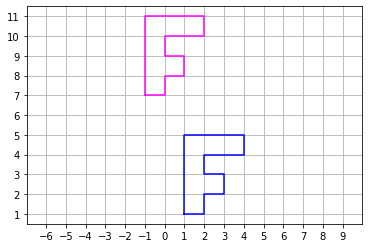

In [26]:
axs = pl.axes()
axs.axis ('equal')
axs.xaxis.set_major_locator (tk.MultipleLocator (1.0))
axs.yaxis.set_major_locator (tk.MultipleLocator (1.0))
axs.grid()

T = tl(tl_x, tl_y)
Q = T @ P
print(f'Translationsmatrix:\n{T}')
print(f'Q = T*P:\n{Q}')
pl.plot (P [0, :], P [1, :], 'blue')
pl.plot (Q [0, :], Q [1, :], 'magenta')

### Plot Skalierung

Skaliermatrix:
[[2 0 0]
 [0 2 0]
 [0 0 2]]
Q = S*P:
[[ 2  4  4  6  6  4  4  8  8  2  2]
 [ 2  2  4  4  6  6  8  8 10 10  2]
 [ 2  2  2  2  2  2  2  2  2  2  2]]


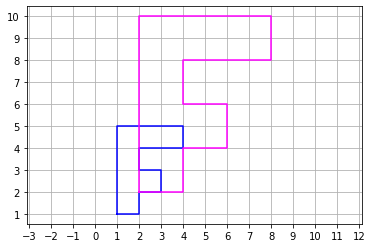

In [36]:
axs = pl.axes()
axs.axis ('equal')
axs.xaxis.set_major_locator (tk.MultipleLocator (1.0))
axs.yaxis.set_major_locator (tk.MultipleLocator (1.0))
axs.grid()

S = sk(s)
print(f'Skaliermatrix:\n{S}')
print(f'Q = S*P:\n{np.around(Q, 4)}')
Q = S @ P
pl.plot (P [0, :], P [1, :], 'blue')
pl.plot (Q [0, :], Q [1, :], 'magenta')

### Plot Drehstreckung

Drehstreckung:
[[ 1 -1  0]
 [ 1  1  0]
 [ 0  0  1]]
Q = D*P:
[[ 2  4  4  6  6  4  4  8  8  2  2]
 [ 2  2  4  4  6  6  8  8 10 10  2]
 [ 2  2  2  2  2  2  2  2  2  2  2]]


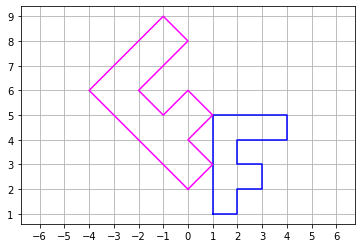

In [37]:
axs = pl.axes()
axs.axis ('equal')
axs.xaxis.set_major_locator (tk.MultipleLocator (1.0))
axs.yaxis.set_major_locator (tk.MultipleLocator (1.0))
axs.grid()

D = drst(ds)
print(f'Drehstreckung:\n{D}')
print(f'Q = D*P:\n{np.around(Q, 4)}')
Q = D @ P
pl.plot (P [0, :], P [1, :], 'blue')
pl.plot (Q [0, :], Q [1, :], 'magenta')

### Drehstreckung mit Winkel

Drehstreckung mit Winkel:
[[ 1.73205081 -1.          0.        ]
 [ 1.          1.73205081  0.        ]
 [ 0.          0.          1.        ]]
Q = D*P:
[[ 0.7321  2.4641  1.4641  3.1962  2.1962  0.4641 -0.5359  2.9282  1.9282
  -3.2679  0.7321]
 [ 2.7321  3.7321  5.4641  6.4641  8.1962  7.1962  8.9282 10.9282 12.6603
   9.6603  2.7321]
 [ 1.      1.      1.      1.      1.      1.      1.      1.      1.
   1.      1.    ]]


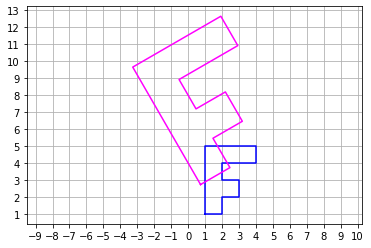

In [38]:
axs = pl.axes()
axs.axis ('equal')
axs.xaxis.set_major_locator (tk.MultipleLocator (1.0))
axs.yaxis.set_major_locator (tk.MultipleLocator (1.0))
axs.grid()

D = drstw(dss,dw)
Q = D @ P
print(f'Drehstreckung mit Winkel:\n{D}')
print(f'Q = D*P:\n{np.around(Q, 4)}')
pl.plot (P [0, :], P [1, :], 'blue')
pl.plot (Q [0, :], Q [1, :], 'magenta')

### Achsenspiegelung

Achsenspiegelung:  vertikal

[[-1  0  0]
 [ 0  1  0]
 [ 0  0  0]]
Q = A*P \[[-1 -2 -2 -3 -3 -2 -2 -4 -4 -1 -1]
 [ 1  1  2  2  3  3  4  4  5  5  1]
 [ 0  0  0  0  0  0  0  0  0  0  0]]


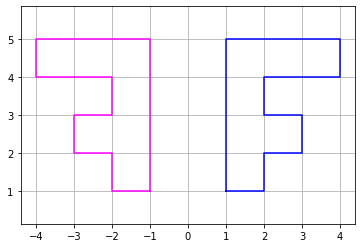

In [40]:
axs = pl.axes()
axs.axis ('equal')
axs.xaxis.set_major_locator (tk.MultipleLocator (1.0))
axs.yaxis.set_major_locator (tk.MultipleLocator (1.0))
axs.grid()

A = acs(h,v)
Q = A @ P
print(f'Achsenspiegelung: {"horizontal" if h else ""} {"vertikal" if v else ""}')
print(f'\n{A}')
print(f'Q = A*P \{Q}')
pl.plot (P [0, :], P [1, :], 'blue')
pl.plot (Q [0, :], Q [1, :], 'magenta')

### Achsenspiegelung mit Winkel

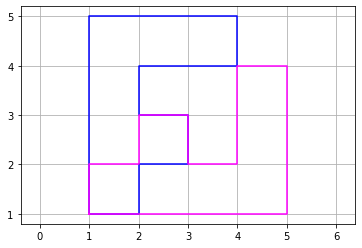

In [31]:
axs = pl.axes()
axs.axis ('equal')
axs.xaxis.set_major_locator (tk.MultipleLocator (1.0))
axs.yaxis.set_major_locator (tk.MultipleLocator (1.0))
axs.grid()

A = acw(aw)
Q = A @ P
print(f'Achsenspiegelung mit Winkel: \n{A}')
print(f'Q = A*P: \n{Q}')
pl.plot (P [0, :], P [1, :], 'blue')
pl.plot (Q [0, :], Q [1, :], 'magenta')

### Scherung

Scherungsmatrix:
[[1 1 0]
 [2 1 0]
 [0 0 1]]
Q = S*P:
[[ 2  3  4  5  6  5  6  8  9  6  2]
 [ 3  5  6  8  9  7  8 12 13  7  3]
 [ 1  1  1  1  1  1  1  1  1  1  1]]


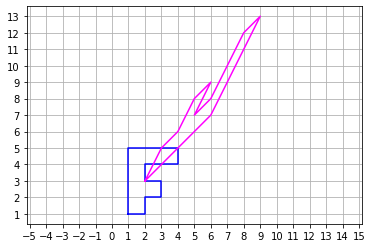

In [39]:
axs = pl.axes()
axs.axis ('equal')
axs.xaxis.set_major_locator (tk.MultipleLocator (1.0))
axs.yaxis.set_major_locator (tk.MultipleLocator (1.0))
axs.grid()

S = sch(sx, sy)
Q = S @ P
print(f'Scherungsmatrix:\n{S}')
print(f'Q = S*P:\n{Q}')
pl.plot (P [0, :], P [1, :], 'blue')
pl.plot (Q [0, :], Q [1, :], 'magenta')